# Assignment

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import stats
from math import comb

1. **Probability and Expected Value**

   - Generate 10,000 random samples of flipping 3 coins (use `np.random.binomial()`)
   - Plot the probability distribution of getting 0, 1, 2, or 3 heads
   - Calculate the expected value (mean) of your distribution
   - Compare your empirical results with the theoretical probability for each outcome

Sample of first 20 results: [1 3 2 2 1 1 0 2 2 2 0 3 2 1 1 1 1 2 1 1]
Unique values and their counts:
0 heads: 1278 times (0.1278 probability)
1 heads: 3798 times (0.3798 probability)
2 heads: 3728 times (0.3728 probability)
3 heads: 1196 times (0.1196 probability)


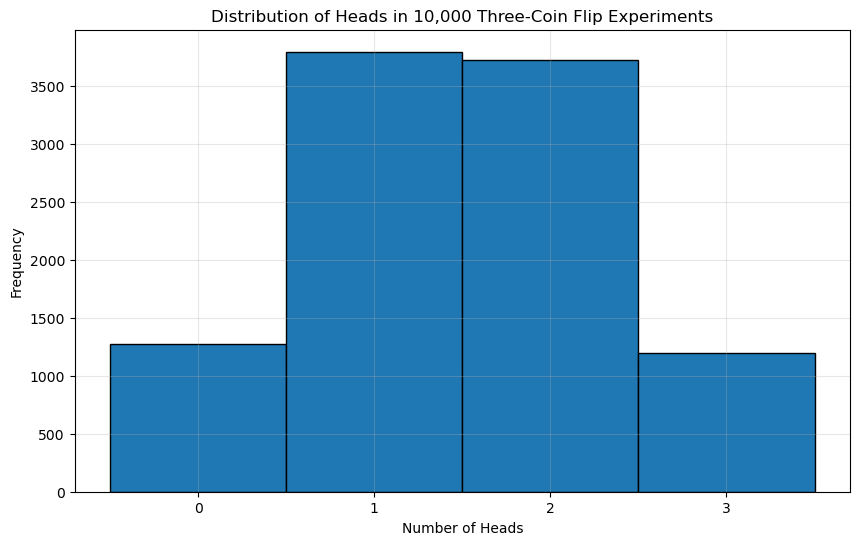


Empirical Expected Value (Mean): 1.4842
Theoretical Expected Value: 1.5000
Difference from empirical: 0.0158

 Heads  Empirical Prob  Theoretical Prob  Difference
     0          0.1278             0.125      0.0028
     1          0.3798             0.375      0.0048
     2          0.3728             0.375      0.0022
     3          0.1196             0.125      0.0054


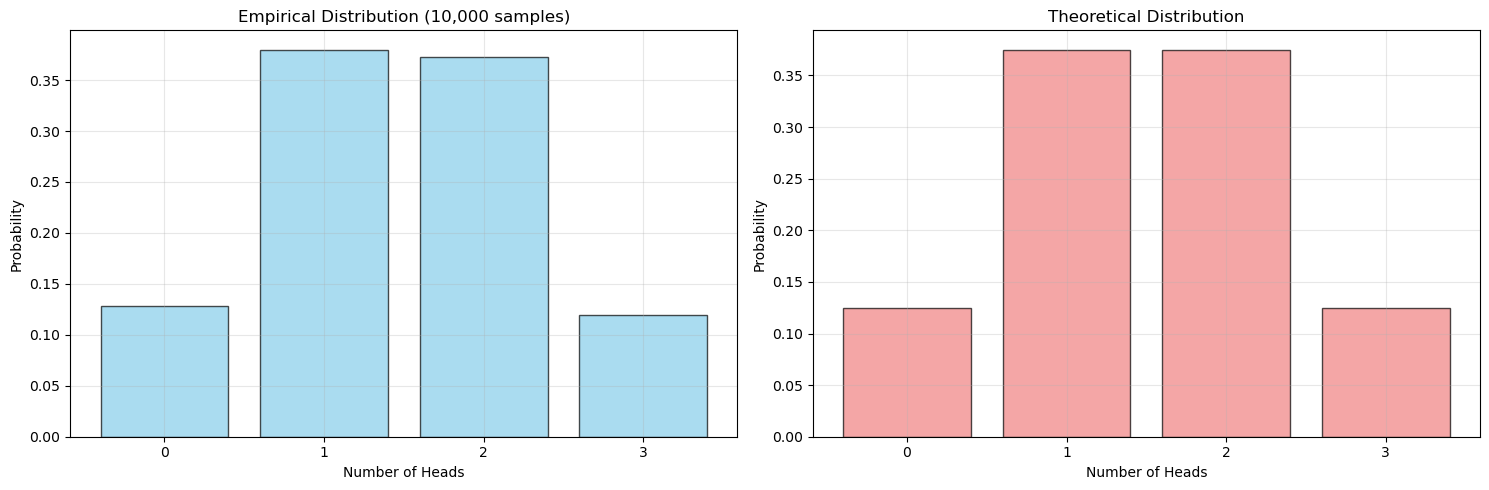

In [2]:
# Question 1: Probability and Expected Value

# Generate 10,000 random samples of flipping 3 coins
# n=3 (number of coins), p=0.5 (probability of heads), size=10000 (number of experiments)
np.random.seed(42)  # For reproducibility
coin_flips = np.random.binomial(n=3, p=0.5, size=10000)

print("Sample of first 20 results:", coin_flips[:20])
print("Unique values and their counts:")
unique, counts = np.unique(coin_flips, return_counts=True)
for val, count in zip(unique, counts):
    print(f"{val} heads: {count} times ({count/10000:.4f} probability)")

# Plot the probability distribution
plt.figure(figsize=(10, 6))
plt.xlabel('Number of Heads')
plt.ylabel('Frequency')
plt.title('Distribution of Heads in 10,000 Three-Coin Flip Experiments')
plt.hist(coin_flips, bins=[-.5, 0.5, 1.5, 2.5, 3.5], edgecolor='black')
plt.xticks([0, 1, 2, 3])
plt.grid(True, alpha=0.3)
plt.show()

# Calculate the expected value (mean) of the distribution
empirical_mean = np.mean(coin_flips)
print(f"\nEmpirical Expected Value (Mean): {empirical_mean:.4f}")
# Theoretical expected value
theoretical_mean = 3 * 0.5  # n * p for binomial distribution
print(f"Theoretical Expected Value: {theoretical_mean:.4f}")
print(f"Difference from empirical: {abs(empirical_mean - theoretical_mean):.4f}")

# Compare with theoretical probabilities
theoretical_probs = []
results = []
for k in range(4):
    # Theoretical probability using binomial formula: C(n,k) * p^k * (1-p)^(n-k)
    # C(n,k) = 3 choose k, how many sequences of flips turns up k heads, p^k = probability of heads, (1-p)^(n-k) = probability of tails
    theoretical_prob = comb(3, k) * (0.5**k) * (0.5**(3-k))
    empirical_prob = np.mean(coin_flips == k)
    difference = abs(empirical_prob - theoretical_prob)
    # dict to store results for table display
    results.append({
        "Heads": k,
        "Empirical Prob": empirical_prob,
        "Theoretical Prob": theoretical_prob,
        "Difference": difference,
    })
    # list to store theoretical probabilities for charting
    theoretical_probs.append(theoretical_prob)

results_df = pd.DataFrame(results)
print(f"\n{results_df.to_string(index=False)}")

# Create side-by-side comparison plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Empirical distribution
empirical_probs = [np.sum(coin_flips == k) / 10000 for k in range(4)]
ax1.bar(range(4), empirical_probs, alpha=0.7, color='skyblue', edgecolor='black')
ax1.set_xlabel('Number of Heads')
ax1.set_ylabel('Probability')
ax1.set_title('Empirical Distribution (10,000 samples)')
ax1.set_xticks(range(4))
ax1.grid(True, alpha=0.3)

# Theoretical distribution
ax2.bar(range(4), theoretical_probs, alpha=0.7, color='lightcoral', edgecolor='black')
ax2.set_xlabel('Number of Heads')
ax2.set_ylabel('Probability')
ax2.set_title('Theoretical Distribution')
ax2.set_xticks(range(4))
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


2. **Normal Distribution and Statistical Testing**

   - Generate two samples from normal distributions:
     - Sample A: 100 values with mean=70, std=5
     - Sample B: 100 values with mean=73, std=5
   - Create a box plot comparing the two distributions
   - Conduct an independent t-test to determine if the means are significantly different
   - Calculate and visualize the 95% confidence intervals for both samples

First 10 values of sample_A:
[72.48357077 69.30867849 73.23844269 77.61514928 68.82923313 68.82931522
 77.89606408 73.83717365 67.65262807 72.71280022]

First 10 values of sample_B:
[65.92314629 70.89677339 71.28642742 68.98861365 72.19357144 75.02025428
 82.43092951 73.87288906 74.28775195 72.62777042]

Sample A Statistics:
Mean: 69.48
Standard Deviation: 4.54
Size: 100

Sample B Statistics:
Mean: 73.11
Standard Deviation: 4.77
Size: 100

Difference in means: -3.63


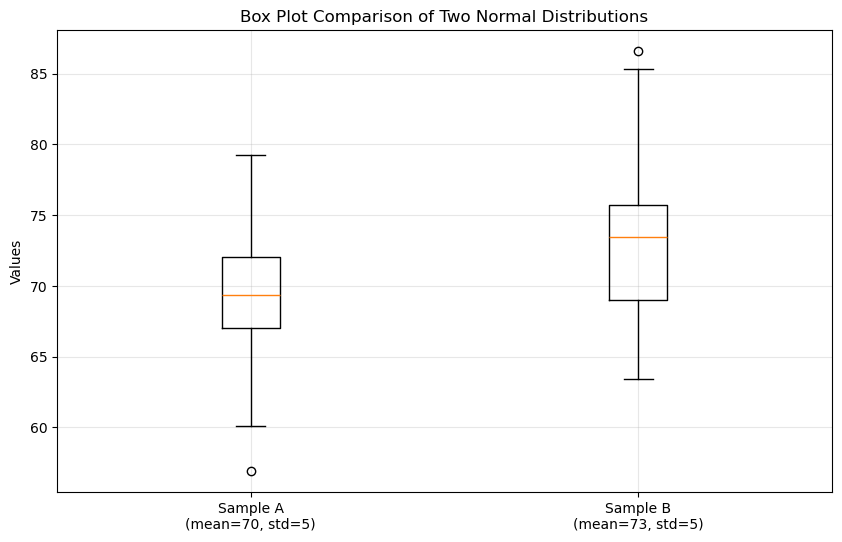


Independent T-Test Results:
T-statistic: -5.5140
P-value: 0.000000

95% Confidence Intervals:
Sample A: [ci_lower: 68.58, ci_upper: 70.38] (mean: 69.48)
Sample B: [ci_lower: 72.17, ci_upper: 74.06] (mean: 73.11)


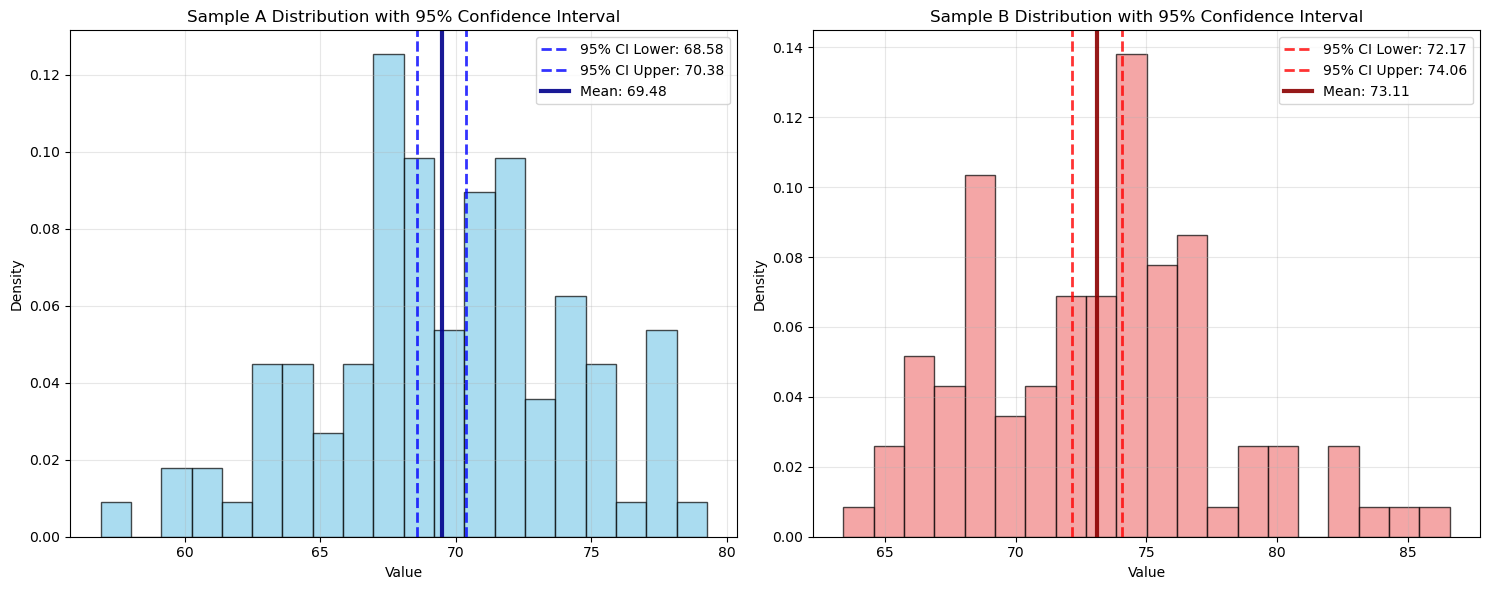

In [4]:
# Question 2: Normal Distribution and Statistical Testing

# Generate two samples from normal distributions
np.random.seed(42)  # For reproducibility

# Sample A: 100 values with mean=70, std=5
sample_A = np.random.normal(loc=70, scale=5, size=100)
print("First 10 values of sample_A:")
print(sample_A[:10])


# Sample B: 100 values with mean=73, std=5  
sample_B = np.random.normal(loc=73, scale=5, size=100)
print("\nFirst 10 values of sample_B:")
print(sample_B[:10])

print("\nSample A Statistics:")
print(f"Mean: {np.mean(sample_A):.2f}")
print(f"Standard Deviation: {np.std(sample_A, ddof=1):.2f}") # ddof=1 for sample standard deviation
print(f"Size: {len(sample_A)}")

print("\nSample B Statistics:")
print(f"Mean: {np.mean(sample_B):.2f}")
print(f"Standard Deviation: {np.std(sample_B, ddof=1):.2f}") # ddof=1 for sample standard deviation
print(f"Size: {len(sample_B)}")

print(f"\nDifference in means: {np.mean(sample_A) - np.mean(sample_B):.2f}")

# Create a box plot comparing the two distributions
plt.figure(figsize=(10, 6))
data_to_plot = [sample_A, sample_B]
labels = ['Sample A\n(mean=70, std=5)', 'Sample B\n(mean=73, std=5)']
box_plot = plt.boxplot(data_to_plot, labels=labels)
plt.title('Box Plot Comparison of Two Normal Distributions')
plt.ylabel('Values')
plt.grid(True, alpha=0.3)
plt.show()

# Perform independent t-test (assuming unequal variances - Welch's t-test)
t_stat, p_value = stats.ttest_ind(sample_A, sample_B, equal_var=False)

print(f"\nIndependent T-Test Results:")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.6f}")

# Calculate and visualize 95% confidence intervals
def calculate_confidence_interval(data, confidence=0.95):
    """Calculate confidence interval for sample mean"""
    # CI formula: mean ± t-score * (standard error of the mean) for small sample size, use z-score for large sample size
    n = len(data)
    mean = np.mean(data)
    sem = stats.sem(data)  # Standard error of the mean
    
    # Calculate t-critical value
    alpha = 1 - confidence
    t_score = stats.t.ppf(1 - alpha/2, df=n-1) # t-score instead of z-score because small sample size
    # use z_score = stats.norm.ppf(1 - alpha/2) i.e. zscore for large sample size
    
    # Calculate margin of error
    margin_error = t_score * sem
    
    # Calculate confidence interval
    ci_lower = mean - margin_error
    ci_upper = mean + margin_error
    
    return mean, ci_lower, ci_upper, margin_error

# Calculate 95% confidence intervals for both samples
mean_A, ci_lower_A, ci_upper_A, me_A = calculate_confidence_interval(sample_A)
mean_B, ci_lower_B, ci_upper_B, me_B = calculate_confidence_interval(sample_B)

print(f"\n95% Confidence Intervals:")
print(f"Sample A: [ci_lower: {ci_lower_A:.2f}, ci_upper: {ci_upper_A:.2f}] (mean: {mean_A:.2f})")
print(f"Sample B: [ci_lower: {ci_lower_B:.2f}, ci_upper: {ci_upper_B:.2f}] (mean: {mean_B:.2f})")

# Visualize confidence intervals - separate distribution plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Sample A distribution with confidence interval
ax1.hist(sample_A, bins=20, alpha=0.7, color='skyblue', density=True, edgecolor='black')

# Add vertical lines for Sample A confidence interval
ax1.axvline(ci_lower_A, color='blue', linestyle='--', alpha=0.8, linewidth=2, label=f'95% CI Lower: {ci_lower_A:.2f}')
ax1.axvline(ci_upper_A, color='blue', linestyle='--', alpha=0.8, linewidth=2, label=f'95% CI Upper: {ci_upper_A:.2f}')

# Add vertical line for Sample A mean
ax1.axvline(mean_A, color='darkblue', linestyle='-', linewidth=3, alpha=0.9, label=f'Mean: {mean_A:.2f}')

ax1.set_xlabel('Value')
ax1.set_ylabel('Density')
ax1.set_title('Sample A Distribution with 95% Confidence Interval')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Sample B distribution with confidence interval
ax2.hist(sample_B, bins=20, alpha=0.7, color='lightcoral', density=True, edgecolor='black')

# Add vertical lines for Sample B confidence interval
ax2.axvline(ci_lower_B, color='red', linestyle='--', alpha=0.8, linewidth=2, label=f'95% CI Lower: {ci_lower_B:.2f}')
ax2.axvline(ci_upper_B, color='red', linestyle='--', alpha=0.8, linewidth=2, label=f'95% CI Upper: {ci_upper_B:.2f}')

# Add vertical line for Sample B mean
ax2.axvline(mean_B, color='darkred', linestyle='-', linewidth=3, alpha=0.9, label=f'Mean: {mean_B:.2f}')

ax2.set_xlabel('Value')
ax2.set_ylabel('Density')
ax2.set_title('Sample B Distribution with 95% Confidence Interval')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()



#### Q2 Observations:
- Sample A mean: 69.48 (95% CI: [lower_ci: 68.58, upper_ci: 70.38]), i.e, 95% confident that population sample lies between 68.58 and 70.38
- Sample B mean: 73.11 (95% CI: [lower ci: 72.17, upper_ci: 74.06]), i.e, 95% confident that population sample lies between 72.17 and 74.06
- Difference in means: 3.63
- Statistical significance: Yes (p = 0.000000), difference in means is 5.51 standard errors apart 
- Confidence intervals: Do not overlap (supporting significance)

3. **Correlation Analysis**
   - Using the iris dataset (from seaborn), analyze the relationship between:
     - Sepal length and petal length
     - Sepal width and petal width
   - For each pair:
     - Create a scatter plot
     - Calculate the Pearson correlation coefficient and p-value
     - Calculate and interpret the R-squared value
   - Which pair shows a stronger relationship? Explain why.

Iris Dataset Overview:
Shape: (150, 5)
Columns: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

First few rows:
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

Dataset Statistics:
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000    

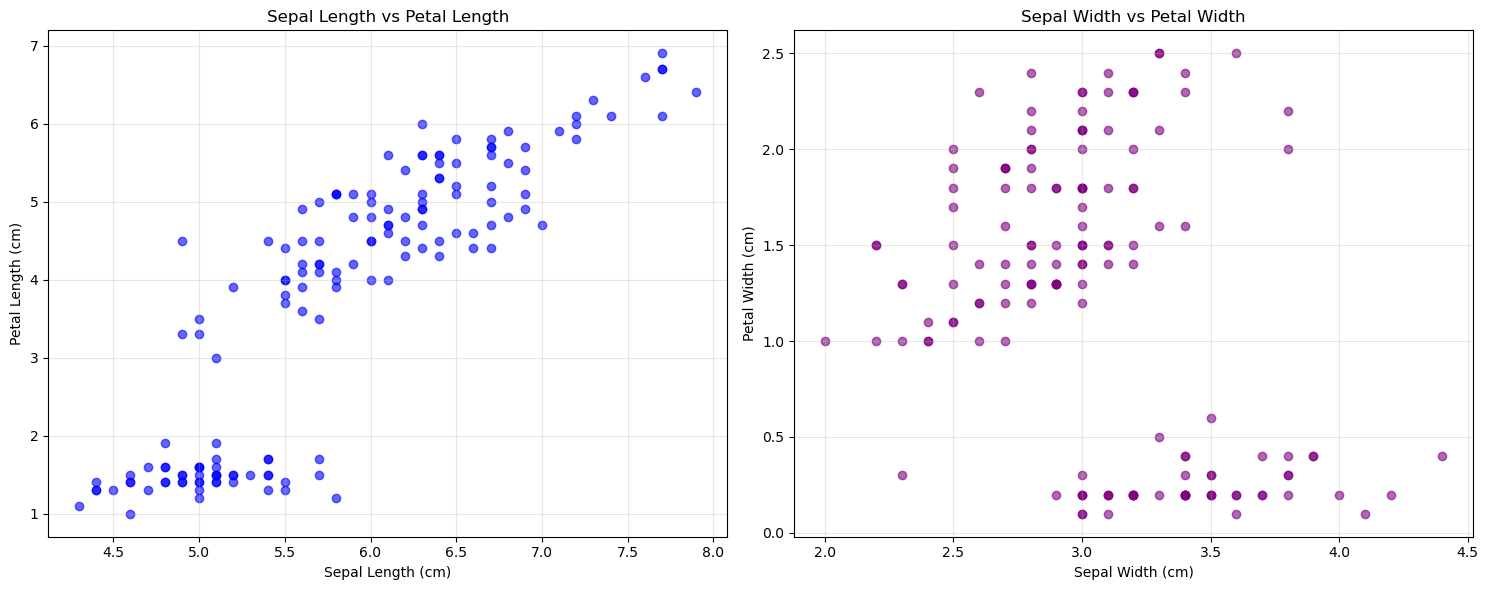


Pearson Correlation Analysis:

Pair 1 - sepal_length vs petal_length:
Correlation coefficient (r): 0.8718
P-value: 1.04e-47

Pair 2 - sepal_width vs petal_width:
Correlation coefficient (r): -0.3661
P-value: 4.07e-06

R-squared Analysis:

Pair 1 - sepal_length vs petal_length:
R-squared (r²): 0.7600

Pair 2 - sepal_width vs petal_width:
R-squared (r²): 0.1340


In [6]:
# Question 3: Correlation Analysis

# Load the iris dataset from seaborn
iris = sns.load_dataset('iris')

print("Iris Dataset Overview:")
print(f"Shape: {iris.shape}")
print(f"Columns: {iris.columns.tolist()}") # prints as clean list instead of index object
print("\nFirst few rows:")
print(iris.head())

print("\nDataset Statistics:")
print(iris.describe())

# Define the variable pairs for analysis
pair1_x, pair1_y = 'sepal_length', 'petal_length'
pair2_x, pair2_y = 'sepal_width', 'petal_width'

print(f"\nScatter Plot Analysis:")
print(f"Pair 1: {pair1_x} vs {pair1_y}")
print(f"Pair 2: {pair2_x} vs {pair2_y}")

# Create scatter plots for both pairs
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Pair 1: Sepal Length vs Petal Length
ax1.scatter(iris[pair1_x], iris[pair1_y], alpha=0.6, color='blue')
ax1.set_xlabel('Sepal Length (cm)')
ax1.set_ylabel('Petal Length (cm)')
ax1.set_title('Sepal Length vs Petal Length')
ax1.grid(True, alpha=0.3)

# Pair 2: Sepal Width vs Petal Width
ax2.scatter(iris[pair2_x], iris[pair2_y], alpha=0.6, color='purple')
ax2.set_xlabel('Sepal Width (cm)')
ax2.set_ylabel('Petal Width (cm)')
ax2.set_title('Sepal Width vs Petal Width')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Calculate Pearson correlation coefficients and p-values
# Pair 1: Sepal Length vs Petal Length
corr1, p_value1 = stats.pearsonr(iris[pair1_x], iris[pair1_y])

# Pair 2: Sepal Width vs Petal Width  
corr2, p_value2 = stats.pearsonr(iris[pair2_x], iris[pair2_y])

print(f"\nPearson Correlation Analysis:")
print(f"\nPair 1 - {pair1_x} vs {pair1_y}:")
print(f"Correlation coefficient (r): {corr1:.4f}")
print(f"P-value: {p_value1:.2e}")

print(f"\nPair 2 - {pair2_x} vs {pair2_y}:")
print(f"Correlation coefficient (r): {corr2:.4f}")
print(f"P-value: {p_value2:.2e}")

# Calculate and interpret R-squared values
r_squared1 = corr1 ** 2
r_squared2 = corr2 ** 2

print(f"\nR-squared Analysis:")
print(f"\nPair 1 - {pair1_x} vs {pair1_y}:")
print(f"R-squared (r²): {r_squared1:.4f}")

print(f"\nPair 2 - {pair2_x} vs {pair2_y}:")
print(f"R-squared (r²): {r_squared2:.4f}")


#### Q3 Observations:
- Scatterplot analysis: 
    - Sepal/Petal length show positive relationship where sepal and petal length tend to increase in tandem
    - Sepal/Petal width doesn't show a clear relationship
- Pearson corrleation analysis:
    - Sepal/Petal length: High correlation coefficient (0.8718, > 0.7) and low p-value (<0.05>) indicates strong postive relationship and the relationship is statistically significant
    - Sepal/Petal width: Moderate correlation coefficient (-0.3661, >= 0.3, < 0.7) and low p-value (<0.05>) indicates moderate negative relationship and the relationship is statistically significant
- R-squared analysis:
    - Sepal/Petal length: 0.7600, 76.00% of the variance in petal_length is explained by sepal_length
    - Sepal/Petal width: 0.1340, 13.40% of the variance in petal_width is explained by sepal_width

Conclusion: Sepal Length vs Petal Length shows a stronger relationship